In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = df.drop(['CustomerID'], axis=1)
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score',
    'Genre' : 'Gender'}, 
    inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


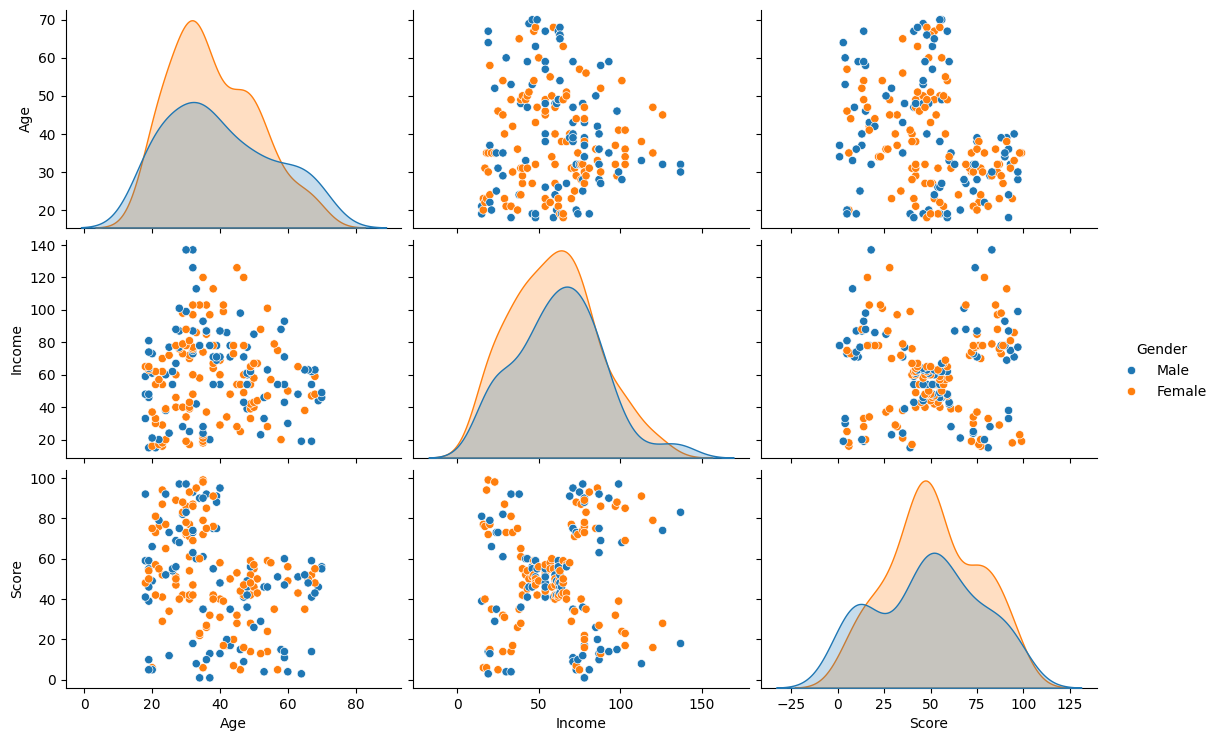

In [6]:
# Inspecting parameters one by one

warnings.filterwarnings('ignore')
sns.pairplot(df, hue='Gender', kind='scatter', aspect=1.5)
plt.show()

# Gender looks useless, we will drop it

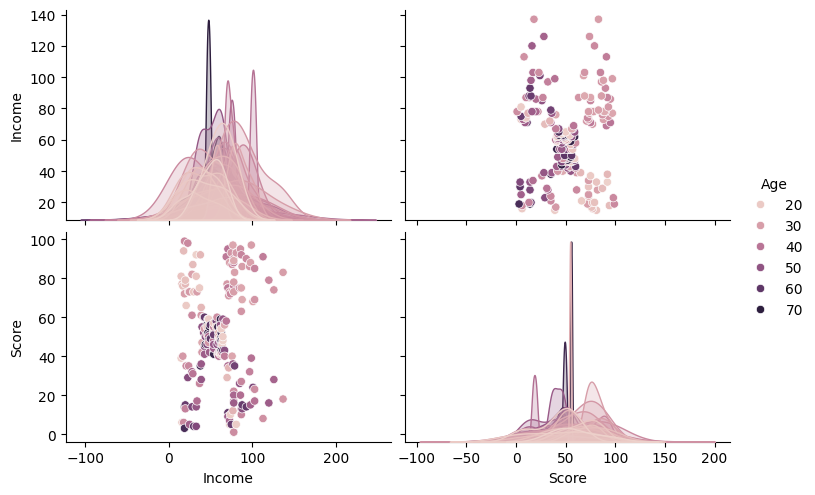

In [7]:
sns.pairplot(df, hue='Age', kind='scatter', aspect=1.5)
plt.show()

# Age might help

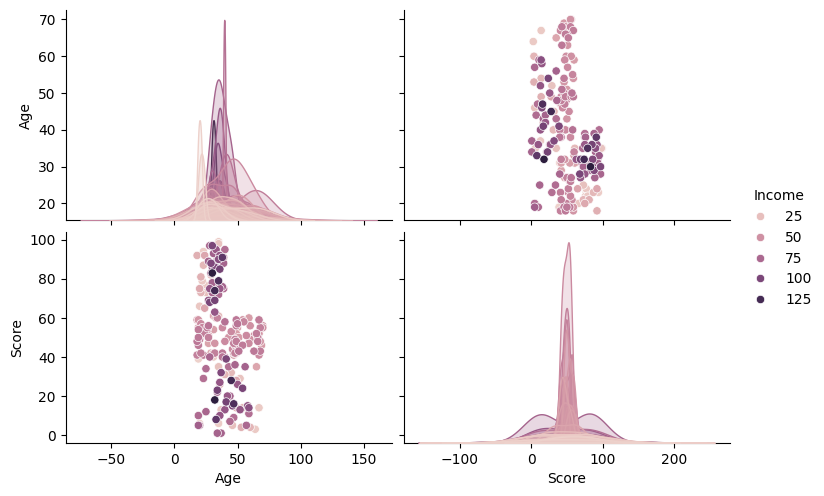

In [8]:
sns.pairplot(df, hue = 'Income', kind = 'scatter', aspect = 1.5)
plt.show()

# Income looks promising

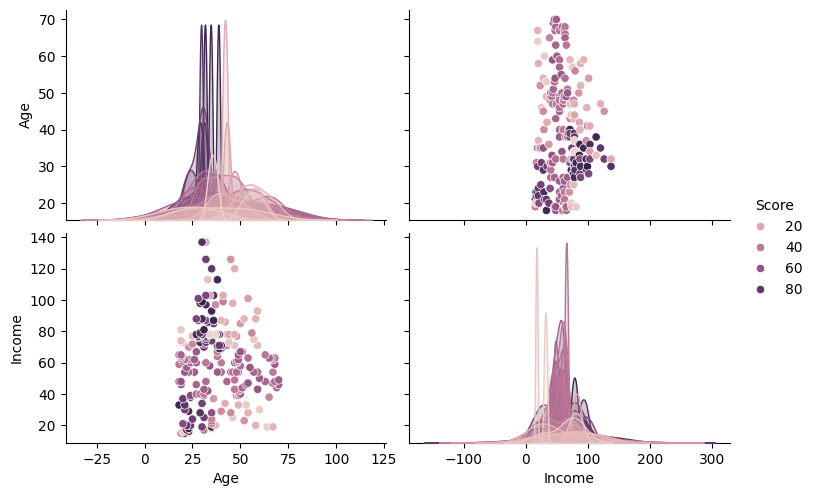

In [9]:
sns.pairplot(df, hue='Score', kind='scatter', aspect=1.5)
plt.show()

# Score looks relevant

In [10]:
df = df.drop(['Gender'], axis=1)
df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


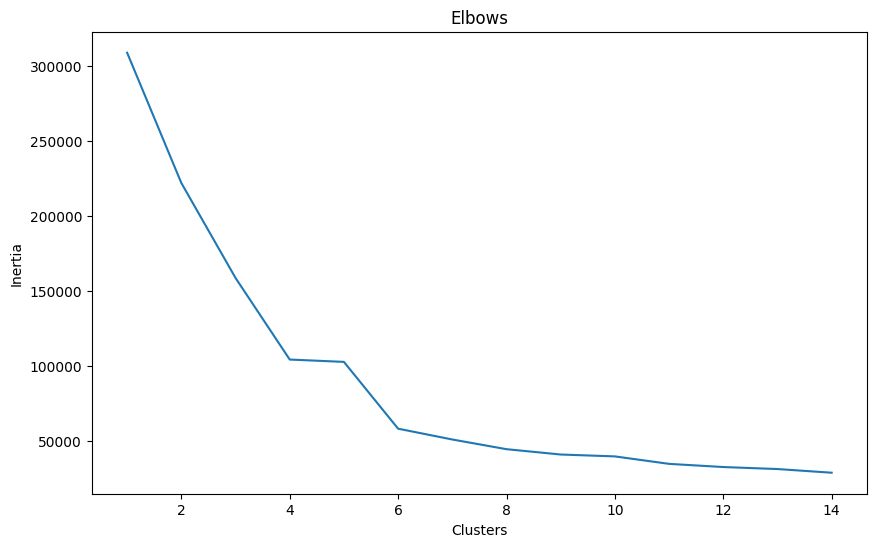

In [11]:
# Now we need to assess the number of clusters, let's use elbow method
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=list(range(1, 15)), y=clusters, ax=ax)
ax.set_title('Elbows')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [12]:
# 4, 5, 6 look promising

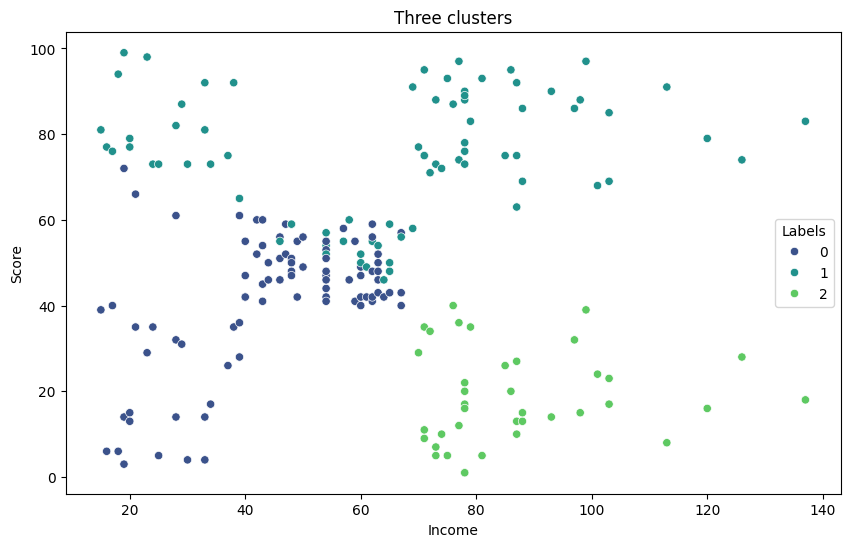

In [13]:
# Let's try it with three clusters

km3 = KMeans(n_clusters=3).fit(df)

df['Labels'] = km3.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Income'], y=df['Score'], hue=df['Labels'], 
                palette=sns.color_palette('viridis', 3))

plt.title('Three clusters')
plt.show()


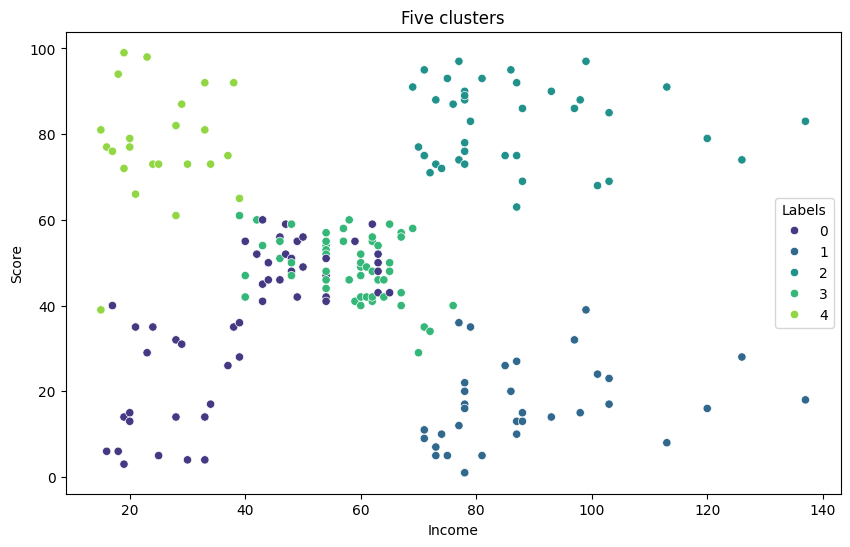

In [14]:
# Ok, it's pretty obvious that there should be five clusters

km5 = KMeans(n_clusters=5).fit(df)

df['Labels'] = km5.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Income'], y=df['Score'], hue=df['Labels'], 
                palette=sns.color_palette('viridis', 5))

plt.title('Five clusters')
plt.show()

Text(0.5, 1.0, 'Income')

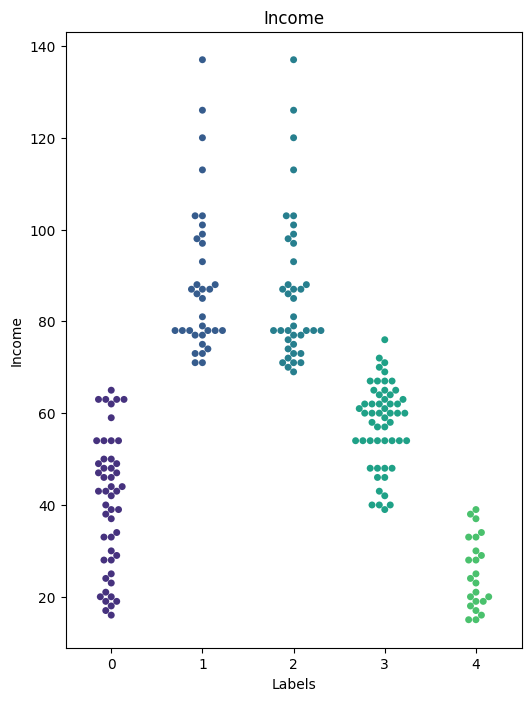

In [40]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='Income', data=df, ax=ax, palette=sns.color_palette('viridis'))
ax.set_title('Income')

Text(0.5, 1.0, 'Score')

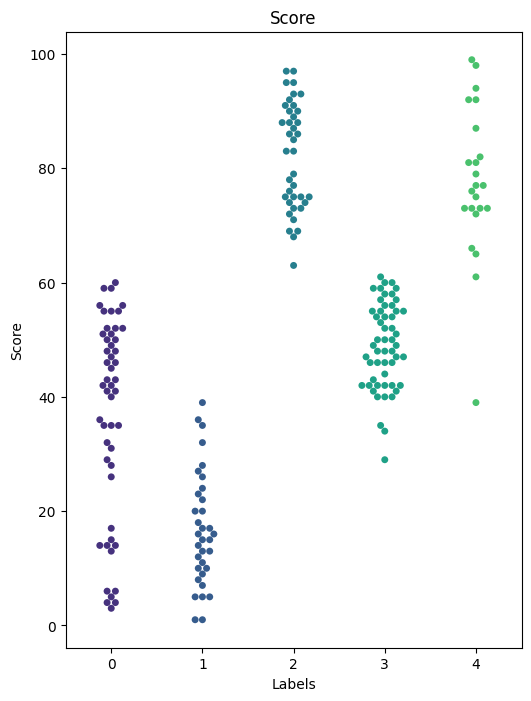

In [37]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='Score', data=df, ax=ax, palette=sns.color_palette('viridis'))
ax.set_title('Income')

Text(0.5, 1.0, 'Age')

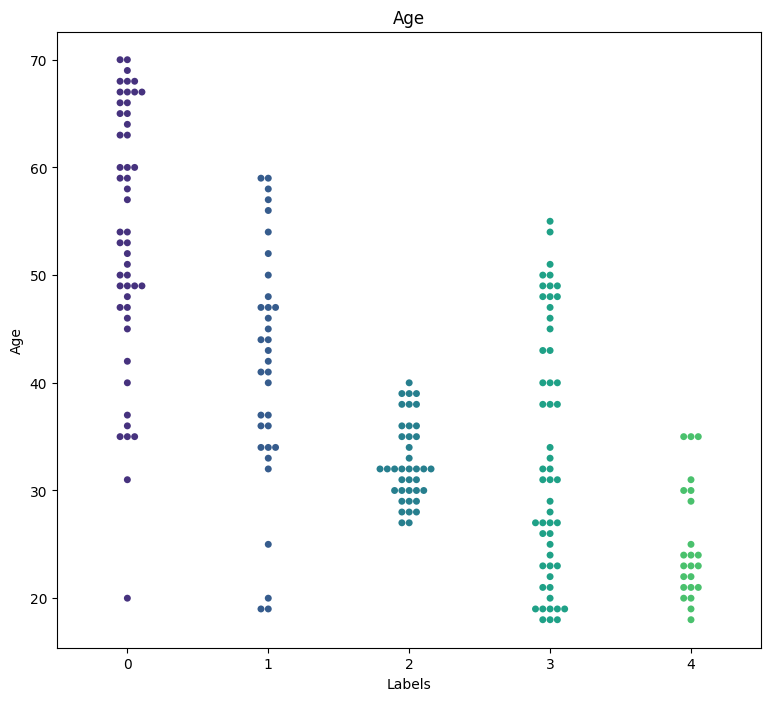

In [21]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Age', data=df, ax=ax, palette=sns.color_palette('viridis'))
ax.set_title('Age')

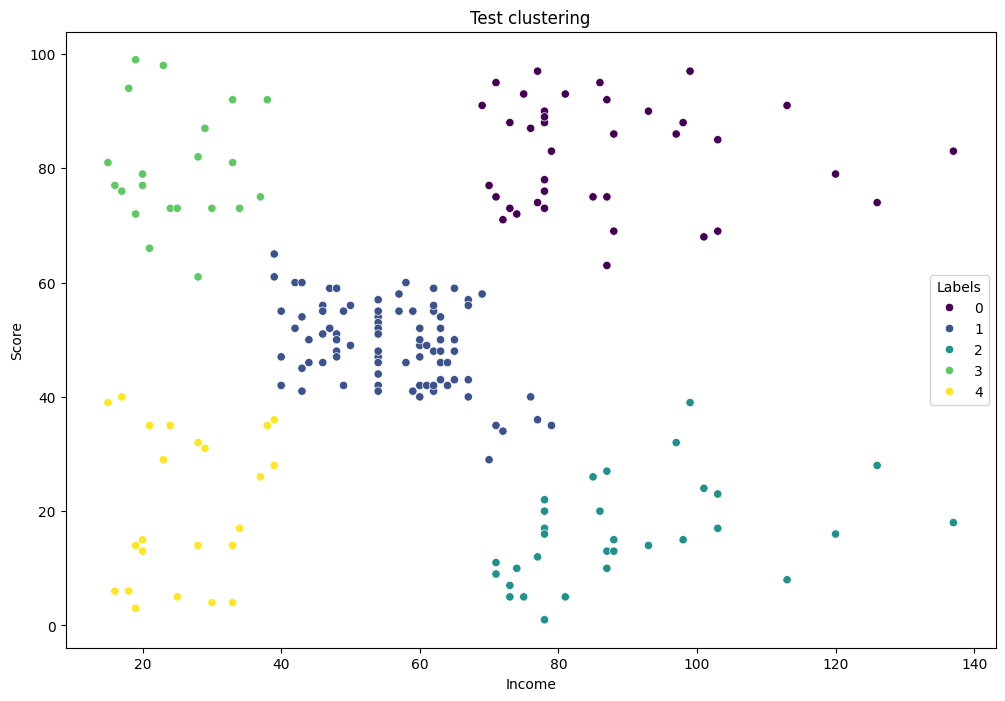

In [71]:
from sklearn.cluster import AgglomerativeClustering

# Out of all combinations, Income and Score produce the most neat clustering
# I also tried ward, complete, average and single linkages: ward and complete fit the fata the best

agg = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(df[['Income', 'Score']])
df['Labels'] = agg.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Score', hue='Labels', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()
          


In [ ]:
# Voilā!